<a href="https://colab.research.google.com/github/yukizaka/Praktikum_TPO/blob/main/Pola_4_Bernoulli_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [2]:
import pandas as pd
import numpy as np
import string
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import (
    confusion_matrix, classification_report,
    f1_score, accuracy_score, precision_score, recall_score
)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB, GaussianNB

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from google.colab import drive
drive.mount('/content/drive')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Data

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Praktikum/train.csv')
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


# Data Preprocessing

In [4]:
# Convert the 'text' column to strings, handling possible NaN values
data['text'] = data['text'].astype(str)

# Apply the 'lower' method after ensuring the data is of type string
data['text'] = data['text'].apply(lambda text: text.lower())


In [5]:
STOPWORDS = set(stopwords.words('english'))
FREQWORDS = set()
RAREWORDS = set()
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N": wordnet.NOUN, "V": wordnet.VERB, "J": wordnet.ADJ, "R": wordnet.ADV}

In [6]:
def preprocess_text(text):
    # Lowercase text
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove stopwords
    text = " ".join([word for word in text.split() if word not in STOPWORDS])

    # Remove frequent and rare words
    text = " ".join([word for word in text.split() if word not in FREQWORDS and word not in RAREWORDS])

    # Lemmatize words
    pos_tagged_text = nltk.pos_tag(text.split())
    text = " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

    return text

# Apply preprocessing to the entire 'text' column
data['text_processed'] = data['text'].apply(preprocess_text)


# CountVectorizer and Train-Test Split

In [7]:
# Extract processed text and labels
X = data['text_processed'].values
y = data['label']

# Vectorize text data
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)


# Model Training and Evaluation

In [8]:
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predictions on train set
    train_predictions = model.predict(X_train)
    train_cm = confusion_matrix(y_train, train_predictions)

    # Predictions on test set
    test_predictions = model.predict(X_test)
    test_cm = confusion_matrix(y_test, test_predictions)

    # Print classification reports and metrics
    print("Train Classification Report:\n", classification_report(y_train, train_predictions))
    print("Train Confusion Matrix:\n", train_cm)
    print("Train F1 Score:", f1_score(y_train, train_predictions))
    print("Train Accuracy:", accuracy_score(y_train, train_predictions))
    print("Train Precision:", precision_score(y_train, train_predictions))
    print("Train Recall:", recall_score(y_train, train_predictions))

    print("\nTest Classification Report:\n", classification_report(y_test, test_predictions))
    print("Test Confusion Matrix:\n", test_cm)
    print("Test F1 Score:", f1_score(y_test, test_predictions))
    print("Test Accuracy:", accuracy_score(y_test, test_predictions))
    print("Test Precision:", precision_score(y_test, test_predictions))
    print("Test Recall:", recall_score(y_test, test_predictions))

# Train and evaluate Bernoulli NB model
bernoulli_model = BernoulliNB()
train_evaluate_model(bernoulli_model, X_train, y_train, X_test, y_test)

# Train and evaluate Gaussian NB model (if needed)
# gaussian_model = GaussianNB()
# train_evaluate_model(gaussian_model, X_train.toarray(), y_train, X_test.toarray(), y_test)


Train Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.74      0.80      8294
           1       0.78      0.89      0.83      8346

    accuracy                           0.81     16640
   macro avg       0.82      0.81      0.81     16640
weighted avg       0.82      0.81      0.81     16640

Train Confusion Matrix:
 [[6147 2147]
 [ 943 7403]]
Train F1 Score: 0.8273357174787662
Train Accuracy: 0.8143028846153846
Train Precision: 0.7751832460732985
Train Recall: 0.887011742151929

Test Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.73      0.78      2093
           1       0.76      0.85      0.80      2067

    accuracy                           0.79      4160
   macro avg       0.79      0.79      0.79      4160
weighted avg       0.79      0.79      0.79      4160

Test Confusion Matrix:
 [[1523  570]
 [ 307 1760]]
Test F1 Score: 0.8005458267000227
Test Accura

# Another Data Prepocessing using multinomial naive bayes

Accuracy: 0.902


Text(0.5, 23.52222222222222, 'Predicted label')

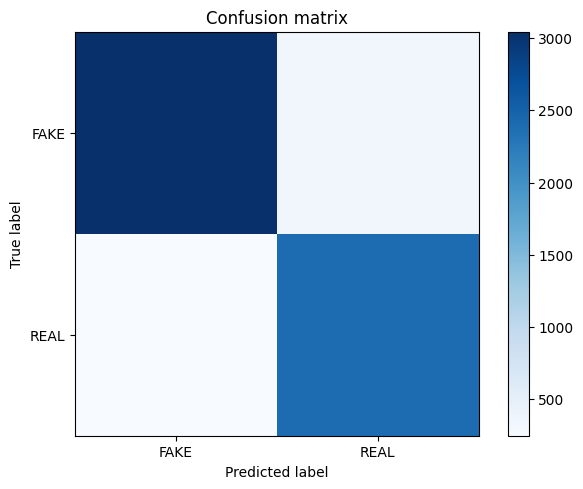

In [39]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Praktikum/train.csv').dropna()

# Select features and target variable
x = data['title']
y = data['label']

# Text preprocessing
ps = PorterStemmer()
corpus = []
for title in x:
    review = re.sub('[^a-zA-Z]', ' ', title).lower().split()
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    corpus.append(' '.join(review))

# Create a Bag of Words (BoW) representation of the text data
cv = CountVectorizer(max_features=5000, ngram_range=(1, 3))
X = cv.fit_transform(corpus).toarray()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# Initialize and train a classifier (Multinomial Naive Bayes)
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions on the test data
pred = classifier.predict(X_test)

# Calculate and print accuracy
score = metrics.accuracy_score(y_test, pred)
print("Accuracy: %0.3f" % score)

# Create and plot a confusion matrix
cm = metrics.confusion_matrix(y_test, pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['FAKE', 'REAL'])
plt.yticks(tick_marks, ['FAKE', 'REAL'])
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')